In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore', UserWarning)

In [2]:
data=r'C:\\Users\\91741\\Desktop\\Technocollab Project\\kickstarter_Cpgn.csv'
df=pd.read_csv(data,encoding='latin-1')

In [3]:
df.shape

(378661, 15)

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# show information and data types of the data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 31.8+ MB


In [7]:
# projects state ratio
(df['state'].value_counts()/len(df))*100

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

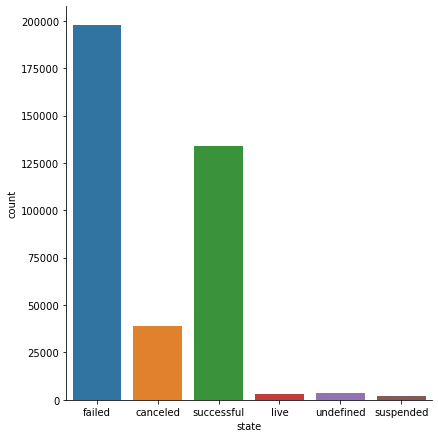

In [9]:
# plot state distribution.
sns.catplot('state',data=df,kind='count', height=6)

<AxesSubplot:xlabel='launched'>

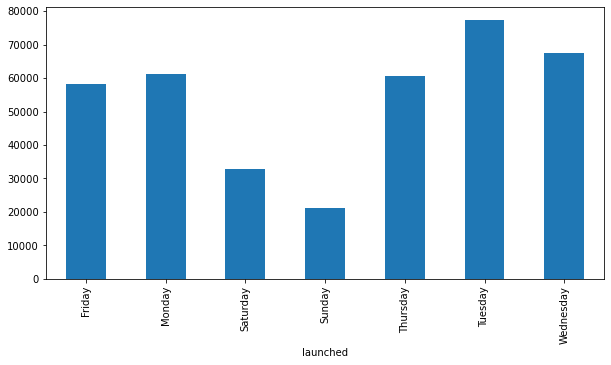

In [10]:
# num of launched projects per day of week 
df.groupby([(pd.to_datetime(df.launched).dt.strftime("%A"))]).size().plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='launched'>

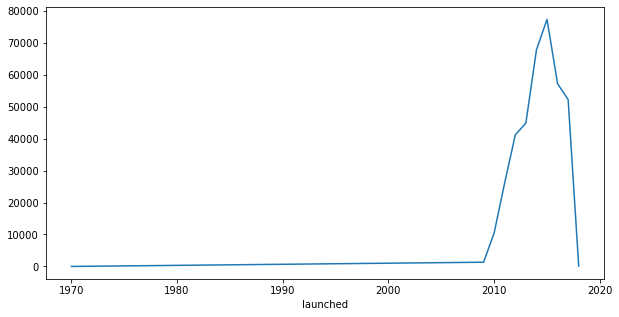

In [11]:
# total projects per year
df.groupby([(pd.to_datetime(df.launched).dt.year)]).size().plot(figsize=(10,5))

<AxesSubplot:xlabel='launched'>

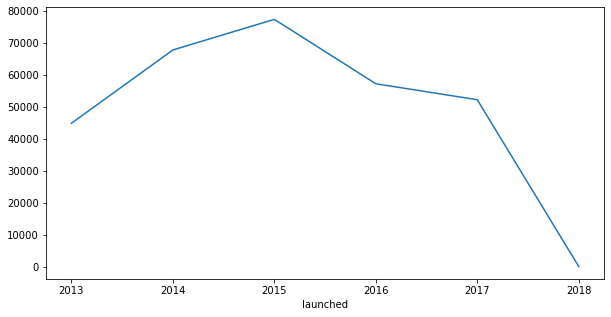

In [13]:
# i will reduce datapoints to get more clean data
start_date ='2013-01-01'
df=df[df['launched']>=start_date]
df.groupby([(pd.to_datetime(df.launched).dt.year)]).size().plot(figsize=(10,5))

In [14]:
# average pledged amount in USD
round(df['usd_pledged_real'].mean())

9926

In [15]:
# average backers
int(df['backers'].mean())

112

In [16]:
#average projects goal in USD
round(df['usd_goal_real'].mean())

53155

<AxesSubplot:xlabel='country', ylabel='main_category'>

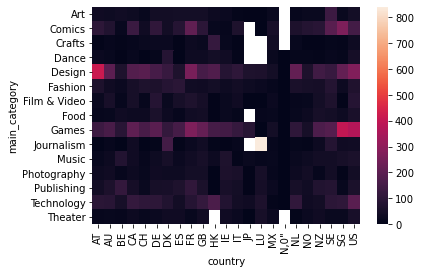

In [17]:
# heat map of average backers by country and main_category
pivot_table = df.pivot_table(index='main_category', 
                   columns='country', 
                   values='backers', 
                   aggfunc='mean')
sns.heatmap(pivot_table)

In [23]:
# for the prediction purpose, i will filter the data
# to have only successful and failed projects.
df = df.loc[df['state'].isin(['successful', 'failed'])]

In [26]:
# projects main category ratio
(df['main_category'].value_counts()/len(df))*100

Film & Video    14.267193
Music           11.126592
Publishing      10.715585
Technology       9.934208
Games            9.722125
Design           8.777429
Food             7.549054
Art              7.472812
Fashion          6.801347
Comics           3.088742
Crafts           2.844150
Photography      2.834088
Theater          2.525253
Journalism       1.368087
Dance            0.973335
Name: main_category, dtype: float64

<AxesSubplot:ylabel='main_category'>

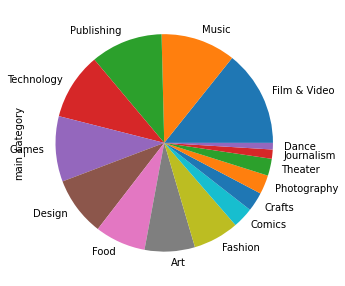

In [31]:
# plot main category ratio distibution
(df['main_category'].value_counts()/len(df)).plot.pie(y='mass', figsize=(5, 5))

In [32]:
# count projects by country
df['country'].value_counts()

US      188632
GB       28897
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

C:\Users\91741\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


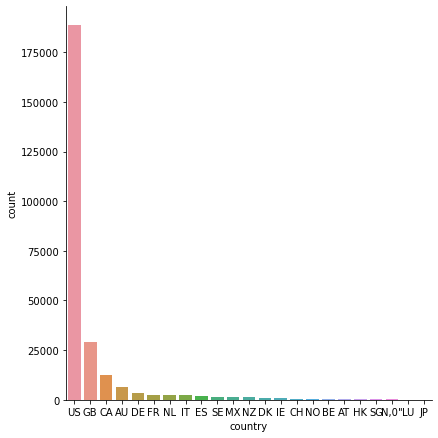

In [34]:
# plot country distribution
sns.catplot('country',data=df,order=df['country'].value_counts().index,kind='count', height=6,)

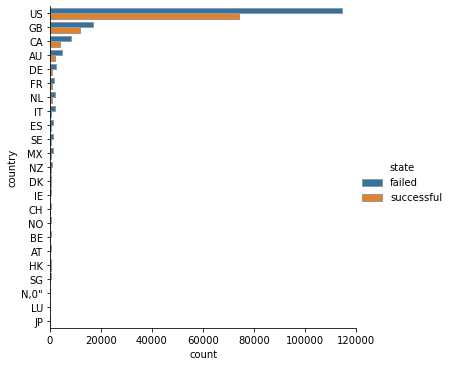

In [36]:
# now country/state distribution.
sns.catplot(y="country", hue="state", kind="count",edgecolor=".6", data=df, order = df['country'].value_counts().index)

In [38]:
# checking which columns has null values
df.isnull().sum()

ID                    0
name                  0
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [40]:
# we can see that usd_pledged are the only column that has null values
# we will drop this column and so all columns that is known just after project is launched like
# pledged, backers, usd_pledged_real
# name, ID also are not influcing the machine learning process , so i will delete it as well.
df = df.drop(['ID', 'name', 'usd pledged', 'pledged', 'backers', 'usd_pledged_real'], axis=1)

In [41]:
# the dataframe now 
df.head()

,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,US,45000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,successful,US,50000.00
6,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,successful,US,1000.00


In [42]:
# encode string values to integers for the macheine learning purpose
countryTransformer = preprocessing.LabelEncoder()
currencyTransformer = preprocessing.LabelEncoder()
main_categoryTransformer = preprocessing.LabelEncoder()
categoryTransformer = preprocessing.LabelEncoder()
df['country'] = countryTransformer.fit_transform(df['country'])
df['currency'] = currencyTransformer.fit_transform(df['currency'])
df['main_category'] = main_categoryTransformer.fit_transform(df['main_category'])
df['category'] = categoryTransformer.fit_transform(df['category'])

In [44]:
# convert dates to Unix time in nano seconds
df["launched"] = pd.to_datetime(df["launched"])
df["deadline"] = pd.to_datetime(df["deadline"])
df["deadline"] =  df.deadline.values.astype(np.int64)
df["launched"] =  df.launched.values.astype(np.int64)
# and now i will add a new feature based on deadline and launched
# project_length will be deadline - launched
df["project_length"] = df["deadline"] - df["launched"]

In [45]:
# and now there is no need for deadline and launched
df = df.drop(['deadline', 'launched'], axis=1)

In [47]:
df.head()

,category,main_category,currency,goal,state,country,usd_goal_real,project_length
0,108,12,5,1000.0,failed,9,1533.95,5053652000000000
1,93,6,13,30000.0,failed,22,30000.00,5166963000000000
2,93,6,13,45000.0,failed,22,45000.00,3886750000000000
5,123,7,13,50000.0,successful,22,50000.00,2974893000000000
6,58,7,13,1000.0,successful,22,1000.00,1661356000000000


In [49]:
# X is the dataframe without the state column
X = df.drop('state', axis=1)
# Y is the state column
Y = df['state']

In [50]:
# here we are splitting the data into 80% and 20%
# 80% is for the model training X_train, Y_train
# 20% is for the model testing X_test, Y_test
# we will predict the state of X_test and compare it to the real data Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
# now let us check multiplue classification machine learning models


# prepare models
classifiers = [
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

# evaluate one by one to check who is the most accuracte 
for clf in classifiers:
    clf.fit(X_train, Y_train)
    
    print("="*30)
    print(clf.__class__.__name__)    
    
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    
    print("Accuracy: {:.2%}".format(acc))

print("="*30)
print('Finish')

DecisionTreeClassifier
Accuracy: 61.43%
GradientBoostingClassifier
Accuracy: 68.57%
KNeighborsClassifier
Accuracy: 59.23%
RandomForestClassifier
Accuracy: 65.74%
GaussianNB
Accuracy: 62.07%
Finish


In [52]:
# we can see that GradientBoostingClassifier is the most accurist model
# so lets perform fine tuning on the learning_rate attribute of the model
learning_rates = [1, 0.7, 0.5, 0.25, 0.1, 0.01]
for lrn in learning_rates:
    clf = GradientBoostingClassifier(learning_rate=lrn)
    clf.fit(X_train, Y_train)
    print("="*30)
    print(lrn)
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    print("Accuracy: {:.2%}".format(acc))
    
print("="*30)
print('Finish')

1
Accuracy: 69.88%
0.7
Accuracy: 69.88%
0.5
Accuracy: 69.99%
0.25
Accuracy: 69.57%
0.1
Accuracy: 68.57%
0.01
Accuracy: 63.68%
Finish


In [53]:
# we will use the best performance learning rate
# in fact, we can get more accuracy if we have more informative data features.
 
clf = GradientBoostingClassifier(learning_rate=0.7)
clf.fit(X_train, Y_train)
print('****Results****')
prediction = clf.predict(X_test)
acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.2%}".format(acc))

****Results****
Accuracy: 69.88%


In [54]:
# comparing prediction to true data
np.column_stack((prediction,Y_test))

array([['successful', 'successful'],
       ['successful', 'failed'],
       ['failed', 'failed'],
       ...,
       ['failed', 'failed'],
       ['failed', 'successful'],
       ['failed', 'failed']], dtype=object)